Prepare Data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
!{sys.executable} -m pip install pandas-profiling as pp
import missingno as mno

%matplotlib inline

  Using cached pandas_profiling-3.2.0-py2.py3-none-any.whl.metadata (21 kB)
ERROR: Ignored the following versions that require a different python version: 3.3.0 Requires-Python >=3.7, <3.11; 3.4.0 Requires-Python >=3.7, <3.11; 3.5.0 Requires-Python >=3.7, <3.11; 3.6.0 Requires-Python >=3.7, <3.11; 3.6.1 Requires-Python >=3.7, <3.11; 3.6.2 Requires-Python >=3.7, <3.11; 3.6.3 Requires-Python >=3.7, <3.11; 3.6.4 Requires-Python >=3.7, <3.11; 3.6.5 Requires-Python >=3.7, <3.11; 3.6.6 Requires-Python >=3.7, <3.11
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


Import

In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv("company_backruption.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [57]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [58]:
# Dimension
print("\nData dimension :")
print("Number of Records : ",df.shape[0],"\nNumber of Features : ",df.shape[1]) # Replace company_df with df

# Datatype of columns
print("\nDatatype of Features :")
print(df.dtypes.value_counts()) # Replace company_df with df


Data dimension :
Number of Records :  6819 
Number of Features :  96

Datatype of Features :
float64    93
int64       3
Name: count, dtype: int64


In [59]:
# Missing values
print("\nMissing values :")
na_value_check = df.isna().sum() # Replace company_df with df
if len(na_value_check[na_value_check > 0]) == 0 :
    print("Missing values not identified")
else :
    print(na_value_check[na_value_check > 0])

# Duplicated records check
print("\nDuplicated records :")
duplicate_rows = df.duplicated() # Replace company_df with df
if len(df[duplicate_rows]) == 0: # Replace company_df with df
    print("Duplicated records not identified")
else :
    print("Number of duplicated records :",len(df[duplicate_rows])) # Replace company_df with df


Missing values :
Missing values not identified

Duplicated records :
Duplicated records not identified


Explore

In [60]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [61]:
(df.isna().sum() > 0).sum()

np.int64(0)

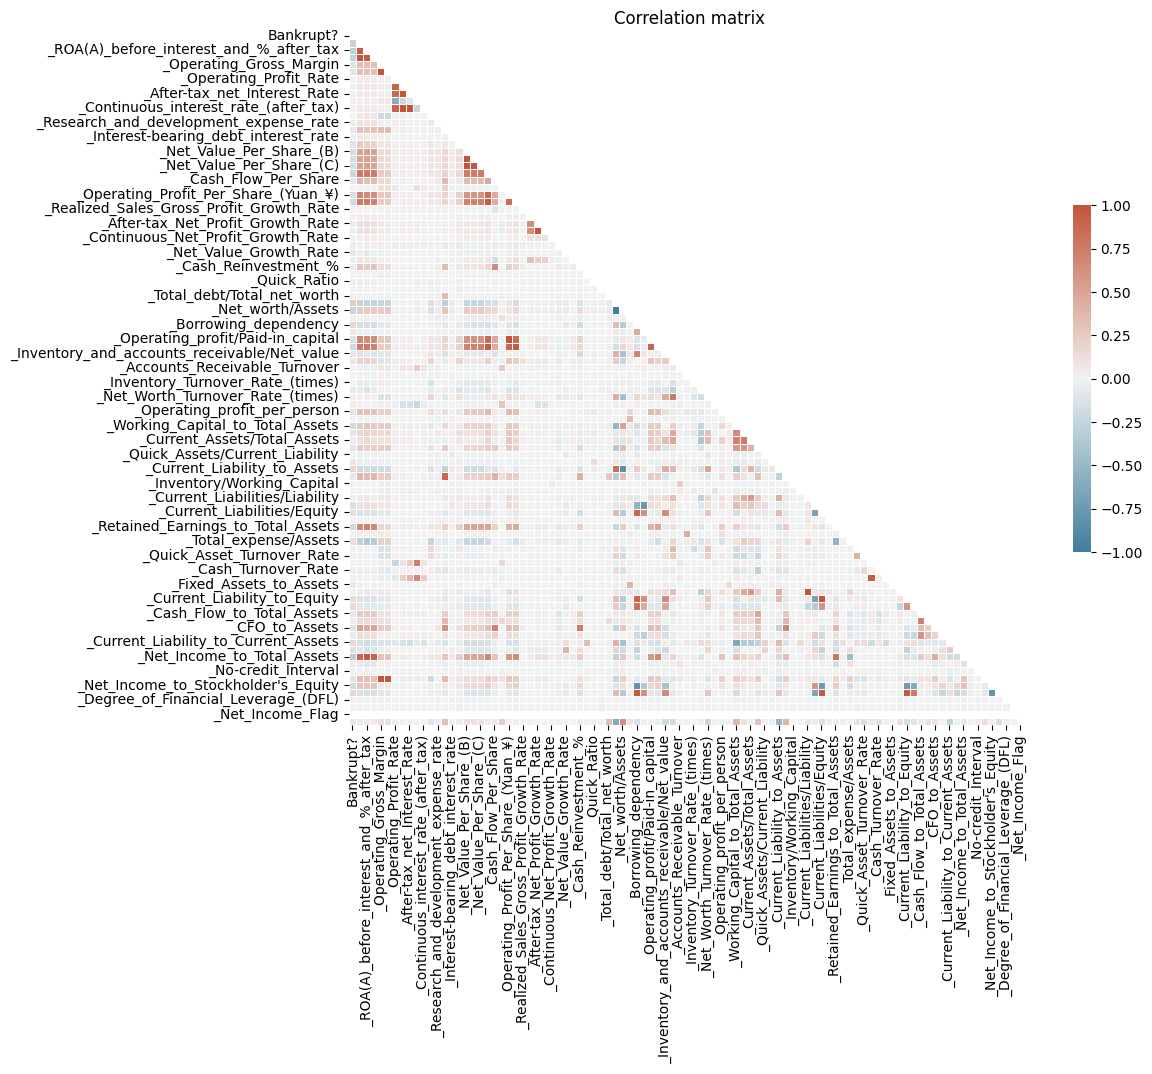

In [62]:
# Correlation

# Compute the correlation matrix
corr = df.corr() # Replace company_df with df which is the dataframe containing the data.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation matrix")
plt.show()

We want to calculate the relative frequencies of the classes

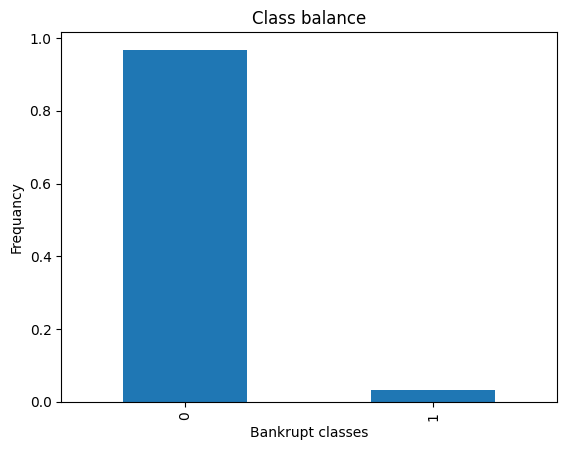

In [63]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

Now we show the distributions of the "_Net_Income_to_Total_Assets" column for both groups in the "bankrupt" column

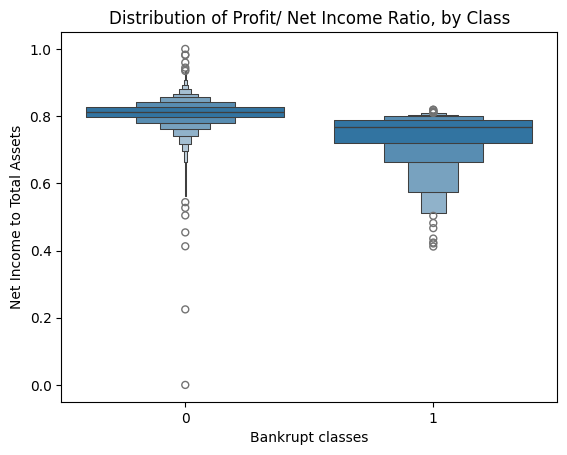

In [64]:
sns.boxenplot(x="Bankrupt?" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");


In [65]:
df['_Net_Income_to_Total_Assets'].describe()

,_Net_Income_to_Total_Assets
count,6819.000000
mean,0.807760
std,0.040332
min,0.000000
25%,0.796750
50%,0.810619
75%,0.826455
max,1.000000


We create a histogram to check whether the distrbution is skewed significantly or not

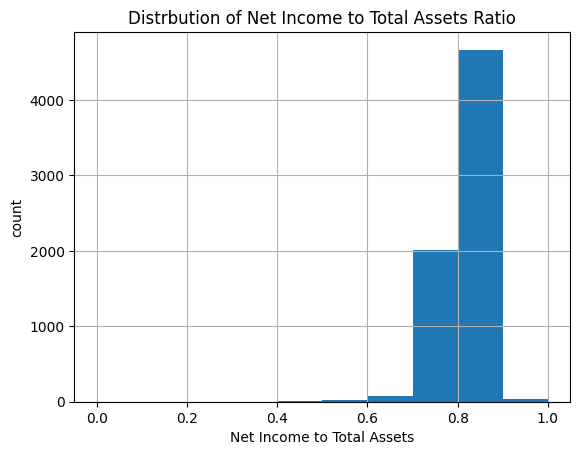

In [66]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

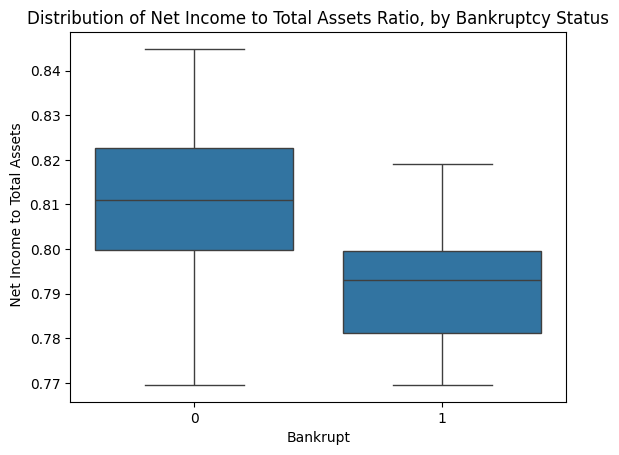

In [67]:
q1 , q9 = df['_Net_Income_to_Total_Assets'].quantile([0.1,0.9])
mask = df["_Net_Income_to_Total_Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='_Net_Income_to_Total_Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

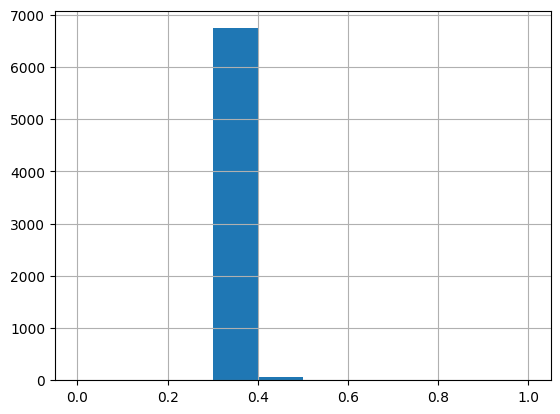

In [68]:
df['_Borrowing_dependency'].hist();

Multicollinearity

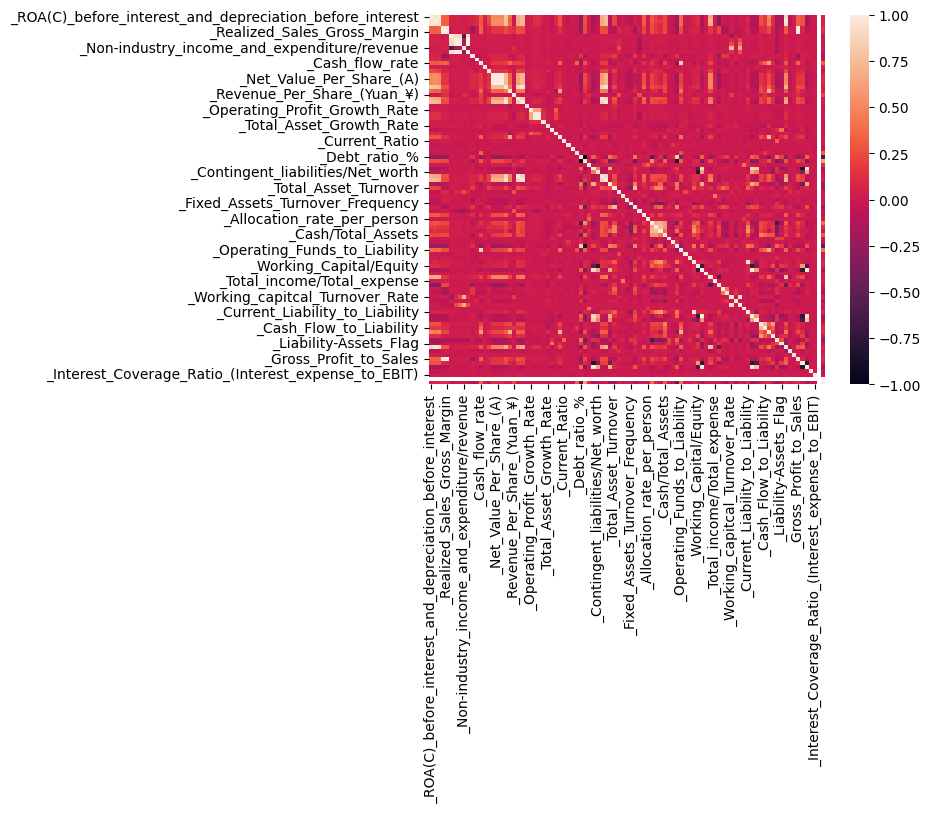

In [69]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

Split


In [70]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)
y shape: (6819,)


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [73]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5455, 95)
y_train shape: (5455,)
X_test shape: (1364, 95)
y_test shape: (1364,)


In [74]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


Resample

In [75]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


Build BaseLine

In [76]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # Import GridSearchCV


iterate

In [78]:
clf = RandomForestClassifier(random_state=42)

In [79]:
params= {

    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)

}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [80]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [81]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [82]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,3.290775,0.054329,0.042333,0.020607,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.991962,0.995272,0.995743,0.995743,0.995270,0.994798,0.001433,1
16,3.821794,0.366773,0.041152,0.009858,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.991962,0.995272,0.995743,0.995743,0.995270,0.994798,0.001433,1
10,3.422714,0.148237,0.031126,0.000532,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.991489,0.995272,0.994797,0.995743,0.994797,0.994419,0.001506,3
15,2.107687,0.418871,0.023859,0.005091,60,25,"{'max_depth': 60, 'n_estimators': 25}",0.991017,0.995272,0.995743,0.994797,0.994324,0.994230,0.001675,4
12,2.329104,0.446070,0.030292,0.011970,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.991017,0.995272,0.995743,0.994797,0.994324,0.994230,0.001675,4
14,6.307967,0.428627,0.057677,0.011443,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991017,0.994799,0.994324,0.996216,0.994324,0.994136,0.001707,6
17,5.544331,0.451093,0.049794,0.021088,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.991017,0.994799,0.994324,0.996216,0.994324,0.994136,0.001707,6
11,5.510710,0.631251,0.058090,0.022703,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.991489,0.994799,0.994324,0.995743,0.994324,0.994136,0.001421,8
9,2.164603,0.590777,0.024319,0.007212,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.991017,0.994799,0.995270,0.994324,0.994797,0.994041,0.001542,9
8,5.435831,0.582037,0.053331,0.026638,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.990071,0.993381,0.993377,0.994324,0.991485,0.992528,0.001536,10


In [83]:
model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [84]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1])

Evaluate

In [85]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0
test accuracy: 0.967


In [86]:
from sklearn.metrics import ConfusionMatrixDisplay # Import the ConfusionMatrixDisplay class
from sklearn.metrics import classification_report  # Assuming you're also using classification_report later
import pickle # Assuming you're also using pickle later


Let's make a confusion matrix to see how our model is making its correct and incorrect predictions

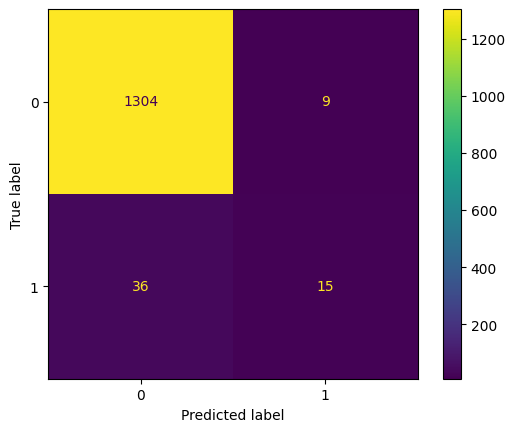

In [87]:
ConfusionMatrixDisplay.from_estimator(

    model,
    X_test,
    y_test

);

Let`s make a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [88]:
print(classification_report(

    y_test,
    model.predict(X_test)

))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.62      0.29      0.40        51

    accuracy                           0.97      1364
   macro avg       0.80      0.64      0.69      1364
weighted avg       0.96      0.97      0.96      1364



Communication

In [89]:
features = X_test.columns
importances = model.best_estimator_.feature_importances_

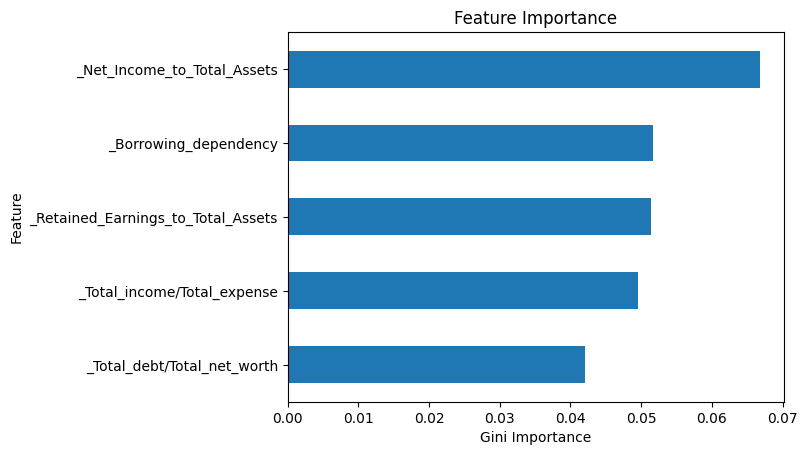

In [90]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [91]:
with open("model-1" , "wb") as f:
    pickle.dump(model ,f)

Preprocess the Data

In [93]:
# Fill missing values with mean
df.fillna(df.mean(), inplace=True)

# Split features and target
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Import StandardScaler
from sklearn.preprocessing import StandardScaler # Import the StandardScaler class

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

Evaluate Logistic Regression

Accuracy: 0.966275659824047

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.63      0.24      0.34        51

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



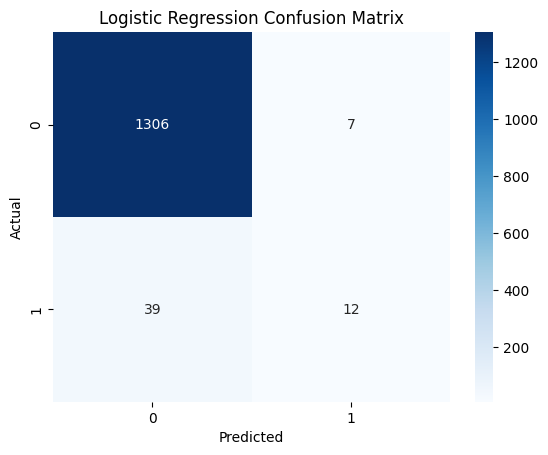

In [97]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # Import necessary functions
import seaborn as sns # Import seaborn
import matplotlib.pyplot as plt # Import pyplot

print('Accuracy:', accuracy_score(y_test, y_pred_logreg))
print('\nClassification Report:\n', classification_report(y_test, y_pred_logreg))
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Feature Importance (Random Forest)


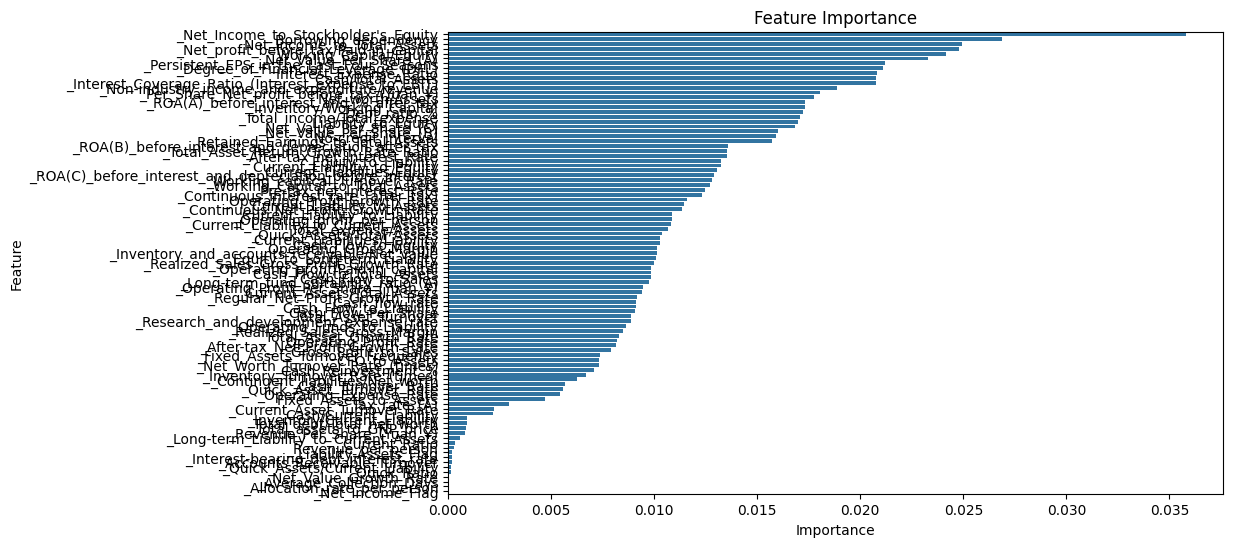

In [99]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier model
rf = RandomForestClassifier(random_state=42) # Initialize with a random state for reproducibility
rf.fit(X_train, y_train) # Fit the model to the training data

# Now you can access feature importances
importances = rf.feature_importances_
features = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
features = features.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features)
plt.title('Feature Importance')
plt.show()